In [1]:
import sys
sys.path.insert(1, "../../")

import utils
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import  MinMaxScaler

# Deep learning import
import tensorflow as tf

# Evaluation Imports
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
# Disable GPU
tf.config.set_visible_devices([], 'GPU')

In [3]:
# Configurations
isDemoMode = False
DATA_FILE_NAME = '../../Data/final_crypto_data.csv'
SELECTED_MONTHS = [10,11,12,1,2,3]

In [4]:
print(f"Default number of DF columns displayed {pd.get_option('display.max_columns')}")

# settings to display all columns
pd.set_option("display.max_columns", None)

Default number of DF columns displayed 20


In [5]:
df = pd.read_csv (DATA_FILE_NAME)
df = utils.setDateTimeAsIndex(df)
df = utils.filterInMonths(df, SELECTED_MONTHS)
df

,Unnamed: 0,_id,high_24h,last_24h,bid_24h,vwap_24h,volume_24h,low_24h,ask_24h,open_24h,high_1min,volume_1min,low_1min,close_1min,open_1min,max_supply,circulating_supply,total_supply,quote_USD_price,quote_volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,reddit_compound_polarity
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-29 17:09:28,0,627127fabbd592fa2c7f25a9,62971.54,62561.13,62559.74,60908.08,5113.537402,56425.0,62561.13,60608.95,62565.90,1.425169,62539.20,62561.86,62545.45,21000000.0,18858012.0,18858012.0,62556.005047,4.304916e+10,6.0514,-0.314446,2.307206,2.108769,26.873643,29.933036,49.972913,1.179682e+12,43.4826,1.313676e+12,0.000834
2021-10-29 17:08:29,1,627127fabbd592fa2c7f25aa,62971.54,62580.05,62571.40,60907.24,5111.938615,56425.0,62580.05,60608.95,62580.05,0.046548,62555.88,62577.47,62555.88,21000000.0,18858012.0,18858012.0,62530.948307,4.305221e+10,6.0179,-0.422853,2.137546,2.146984,26.873643,29.917416,49.972913,1.179209e+12,43.4826,1.313150e+12,0.000834
2021-10-29 17:10:28,2,627127fabbd592fa2c7f25ab,62971.54,62591.17,62582.19,60908.89,5115.569587,56425.0,62596.03,60608.95,62597.65,2.112533,62555.02,62597.64,62560.95,21000000.0,18858012.0,18858012.0,62551.924819,4.304739e+10,6.0643,-0.365020,2.383982,2.150485,26.873643,29.997052,49.972913,1.179605e+12,43.4826,1.313590e+12,0.000834
2021-10-29 17:14:32,3,627127fabbd592fa2c7f25ac,62971.54,62590.43,62572.06,60909.91,5117.061581,56425.0,62590.43,60608.95,62615.00,0.596406,62590.43,62590.43,62603.62,21000000.0,18858012.0,18858012.0,62591.537709,4.311295e+10,6.1673,-0.311393,2.375399,2.464668,26.873643,30.044297,49.972913,1.180352e+12,43.4826,1.314422e+12,0.000834
2021-10-29 17:12:31,4,627127fabbd592fa2c7f25ad,62971.54,62600.43,62587.09,60909.54,5117.193435,56425.0,62606.26,60608.95,62600.43,0.657752,62577.18,62600.43,62577.18,21000000.0,18858012.0,18858012.0,62584.316178,4.310036e+10,6.1706,-0.379612,2.422122,2.443523,26.873643,30.074340,49.972913,1.180216e+12,43.4826,1.314271e+12,0.000834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-29 15:03:51,206562,627127ffbbd592fa2c824c8b,48234.00,47841.78,47821.47,47686.37,2055.574837,46897.0,47841.83,47152.38,47841.78,0.032706,47779.93,47841.78,47787.41,21000000.0,18997287.0,18997287.0,47796.800709,3.593814e+10,-11.6642,0.220574,0.405000,11.727515,23.065838,29.951735,-0.127362,9.080095e+11,41.9541,1.003733e+12,-0.260219
2022-03-29 15:02:51,206563,627127ffbbd592fa2c824c8c,48234.00,47817.06,47781.38,47686.37,2055.589733,46897.0,47804.30,47152.38,47839.85,1.175399,47817.06,47817.06,47823.15,21000000.0,18997287.0,18997287.0,47796.800709,3.593814e+10,-11.6642,0.220574,0.405000,11.727515,23.065838,29.951735,-0.127362,9.080095e+11,41.9541,1.003733e+12,-0.329272
2022-03-29 15:04:51,206564,627127ffbbd592fa2c824c8d,48234.00,47839.81,47813.47,47686.46,2054.541798,46897.0,47834.63,47152.38,47842.74,0.016080,47839.81,47839.81,47842.74,21000000.0,18997287.0,18997287.0,47758.428512,3.581643e+10,-11.9431,0.088208,0.447990,11.702487,23.073256,29.909264,-0.197507,9.072806e+11,41.9258,1.002927e+12,-0.260219


In [6]:
len(df)

206567

In [7]:
df = df[::60]
df

,Unnamed: 0,_id,high_24h,last_24h,bid_24h,vwap_24h,volume_24h,low_24h,ask_24h,open_24h,high_1min,volume_1min,low_1min,close_1min,open_1min,max_supply,circulating_supply,total_supply,quote_USD_price,quote_volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,reddit_compound_polarity
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-29 17:09:28,0,627127fabbd592fa2c7f25a9,62971.54,62561.13,62559.74,60908.08,5113.537402,56425.00,62561.13,60608.95,62565.90,1.425169,62539.20,62561.86,62545.45,21000000.0,18858012.0,18858012.0,62556.005047,4.304916e+10,6.0514,-0.314446,2.307206,2.108769,26.873643,29.933036,49.972913,1.179682e+12,43.4826,1.313676e+12,0.000834
2021-10-29 18:09:54,60,627127fabbd592fa2c7f25e5,62971.54,62397.10,62394.14,60962.99,5204.297994,56425.00,62404.25,60608.95,62407.86,3.846862,62368.24,62397.57,62385.41,21000000.0,18858012.0,18858012.0,62376.389918,4.263720e+10,4.0919,-0.280623,1.947506,2.811090,26.873643,29.034676,49.972913,1.176295e+12,43.4826,1.309904e+12,0.044513
2021-10-29 19:07:24,120,627127fabbd592fa2c7f2621,62971.54,62123.32,62110.79,61347.36,4476.700494,59542.11,62124.20,60608.95,62123.32,0.003650,62118.99,62123.32,62118.99,21000000.0,18858125.0,18858125.0,62111.423525,3.865841e+10,-12.9838,-0.502020,3.646022,2.854153,26.873643,27.902601,49.983726,1.171305e+12,43.4826,1.304340e+12,0.163515
2021-10-29 20:11:43,180,627127fabbd592fa2c7f265d,62971.54,62359.36,62350.16,61408.04,4408.004663,60154.53,62359.36,60608.95,62380.94,0.532779,62340.30,62374.66,62380.94,21000000.0,18858212.0,18858212.0,62366.249249,3.727366e+10,-18.5644,0.375498,0.439496,1.973032,26.873643,28.332142,49.849687,1.176116e+12,43.4826,1.309691e+12,0.000000
2021-10-29 21:10:05,240,627127fabbd592fa2c7f2699,62971.54,62480.44,62463.78,61413.17,4217.489249,60154.53,62480.44,60608.95,62480.44,0.000000,62480.44,62480.44,62480.44,21000000.0,18858212.0,18858212.0,62453.486661,3.676042e+10,-20.7817,0.114540,2.278869,2.628106,26.873643,28.708223,49.937448,1.177761e+12,43.4826,1.311523e+12,0.086260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-29 10:16:54,206280,627127ffbbd592fa2c824b71,48234.00,47552.35,47537.73,47588.96,2164.236991,46897.00,47546.99,47152.38,47552.35,0.005280,47552.35,47552.35,47552.35,21000000.0,18997112.0,18997112.0,47553.425514,3.511657e+10,-3.4909,-0.260349,0.863809,11.826781,21.753626,30.323448,-0.780261,9.033778e+11,41.9428,9.986219e+11,0.135572
2022-03-29 11:21:32,206340,627127ffbbd592fa2c824bad,48234.00,47674.34,47653.42,47606.32,2101.286747,46897.00,47671.09,47152.38,47685.30,0.029528,47653.42,47653.42,47674.34,21000000.0,18997112.0,18997112.0,47690.826626,3.499902e+10,-5.6562,0.337678,1.054571,11.243553,21.252964,30.753092,0.051062,9.059880e+11,41.9238,1.001507e+12,0.000000
2022-03-29 12:17:02,206400,627127ffbbd592fa2c824be9,48234.00,48020.40,47995.74,47629.20,2174.483010,46897.00,48020.46,47152.38,47980.00,0.000000,47980.00,47980.00,47980.00,21000000.0,18997168.0,18997168.0,47950.858377,3.579124e+10,-4.8753,0.555396,1.429614,11.762772,21.519590,31.245459,2.003042,9.109305e+11,41.9279,1.006968e+12,0.380745


In [8]:
len(df)

3443

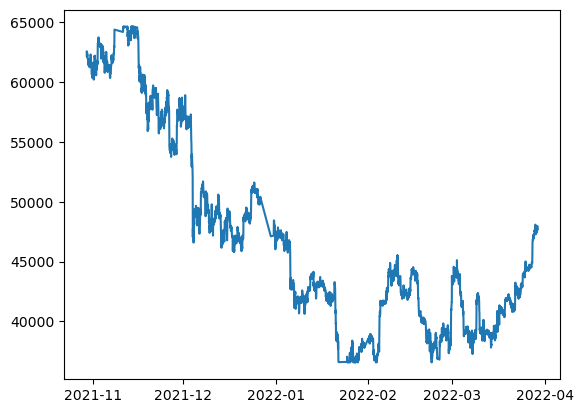

In [9]:
plt.plot(df.index, df['close_1min'] )
plt.show()

In [10]:
test_df = df.tail(round(0.10 * len(df))) if isDemoMode else df

# scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(test_df["close_1min"].values.reshape(-1,1))
scaled_data

array([[0.92539204],
       [0.9195431 ],
       [0.90977944],
       ...,
       [0.40625868],
       [0.40193384],
       [0.396594  ]])

In [11]:
n_steps = 10
X, y = utils.split_sequence(scaled_data, n_steps)

print(f"Split Dataset X length: {len(X)}")
print(f"Split Dataset y length: {len(y)}")

Split Dataset X length: 3433
Split Dataset y length: 3433


In [12]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X

array([[[0.92539204],
        [0.9195431 ],
        [0.90977944],
        ...,
        [0.91442542],
        [0.90660594],
        [0.90289237]],

       [[0.9195431 ],
        [0.90977944],
        [0.91872748],
        ...,
        [0.90660594],
        [0.90289237],
        [0.90180368]],

       [[0.90977944],
        [0.91872748],
        [0.92249339],
        ...,
        [0.90289237],
        [0.90180368],
        [0.90048145]],

       ...,

       [[0.38960831],
        [0.38511827],
        [0.38438987],
        ...,
        [0.39689234],
        [0.39103378],
        [0.39463201]],

       [[0.38511827],
        [0.38438987],
        [0.39141543],
        ...,
        [0.39103378],
        [0.39463201],
        [0.40625868]],

       [[0.38438987],
        [0.39141543],
        [0.39454158],
        ...,
        [0.39463201],
        [0.40625868],
        [0.40193384]]])

In [13]:
train_X, train_y, valid_X, valid_y, test_X, test_y = utils.train_test_valid_split(
        X,
        y,
        train_size=0.8,
        valid_size=0.1
    )
print("----------------------------")
print(f"-------- Train X: {train_X.shape}, Train y: {train_y.shape} --------")
print(f"-------- Valid X: {valid_X.shape}, Valid y: {valid_y.shape} --------")
print(f"-------- Test X: {test_X.shape}, Test y: {test_y.shape} --------")
print("----------------------------\n")

-------- train test valid split --------
2746
2746
343
343
344
344
----------------------------------------
----------------------------
-------- Train X: (2746, 10, 1), Train y: (2746, 1) --------
-------- Valid X: (343, 10, 1), Valid y: (343, 1) --------
-------- Test X: (344, 10, 1), Test y: (344, 1) --------
----------------------------



In [14]:
# define model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(
	64,
	# return_sequences=True,
    # activation='relu',
	# unroll=True,
	input_shape=(train_X.shape[1], train_X.shape[2]),
))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.LSTM(
# 	32,
# 	return_sequences=True,
# ))
model.add(tf.keras.layers.Dense(32, activation='relu'))
# model.add(tf.keras.layers.Dense(16))
# model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , loss='mse')

In [15]:
# fit model
history = model.fit(
    X,
    y,
    epochs=100,
    verbose=2,
    batch_size=32,
    validation_data=(valid_X, valid_y),
    shuffle=False,
)

Epoch 1/100


2023-01-21 16:40:07.406275: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


108/108 - 1s - loss: 0.0573 - val_loss: 0.0013 - 1s/epoch - 13ms/step
Epoch 2/100
108/108 - 0s - loss: 0.0063 - val_loss: 9.9997e-04 - 266ms/epoch - 2ms/step
Epoch 3/100
108/108 - 0s - loss: 0.0043 - val_loss: 6.8630e-04 - 270ms/epoch - 2ms/step
Epoch 4/100
108/108 - 0s - loss: 0.0036 - val_loss: 5.1476e-04 - 268ms/epoch - 2ms/step
Epoch 5/100
108/108 - 0s - loss: 0.0028 - val_loss: 4.9434e-04 - 263ms/epoch - 2ms/step
Epoch 6/100
108/108 - 0s - loss: 0.0032 - val_loss: 5.6151e-04 - 270ms/epoch - 2ms/step
Epoch 7/100
108/108 - 0s - loss: 0.0029 - val_loss: 4.9476e-04 - 266ms/epoch - 2ms/step
Epoch 8/100
108/108 - 0s - loss: 0.0029 - val_loss: 4.5000e-04 - 269ms/epoch - 2ms/step
Epoch 9/100
108/108 - 0s - loss: 0.0045 - val_loss: 8.2213e-04 - 266ms/epoch - 2ms/step
Epoch 10/100
108/108 - 0s - loss: 0.0039 - val_loss: 5.7225e-04 - 264ms/epoch - 2ms/step
Epoch 11/100
108/108 - 0s - loss: 0.0045 - val_loss: 4.6037e-04 - 264ms/epoch - 2ms/step
Epoch 12/100
108/108 - 0s - loss: 0.0057 - val_l

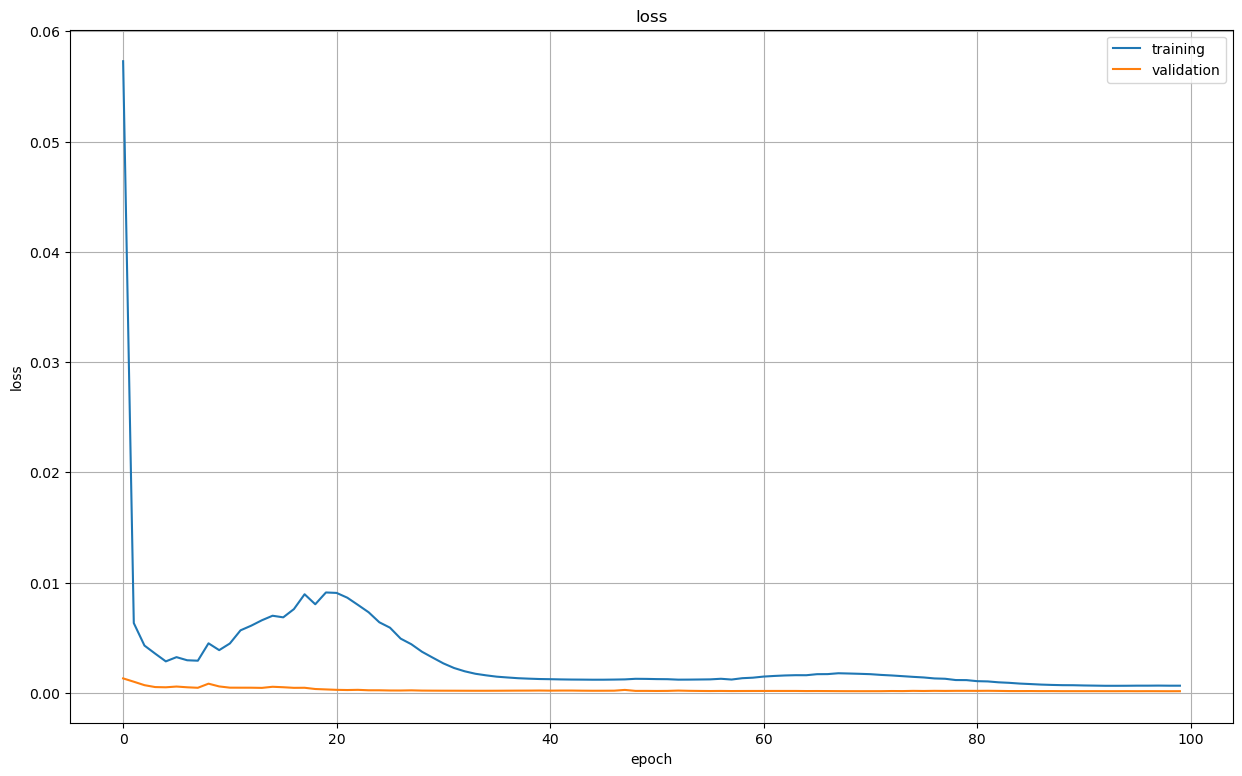

In [16]:
# display training curves
utils.display_training_curves(history.history['loss'], history.history['val_loss'], 'loss')

In [17]:
# make a prediction
y_predict = model.predict(valid_X)

11/11 [==============================] - 0s 2ms/step


In [18]:
# invert scaling for forecast
inv_y_predict = scaler.inverse_transform(y_predict)
# invert scaling for actual
# test_y = test_y.reshape((len(test_y), 1))
inv_y = scaler.inverse_transform(valid_y)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_y_predict))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 332.667


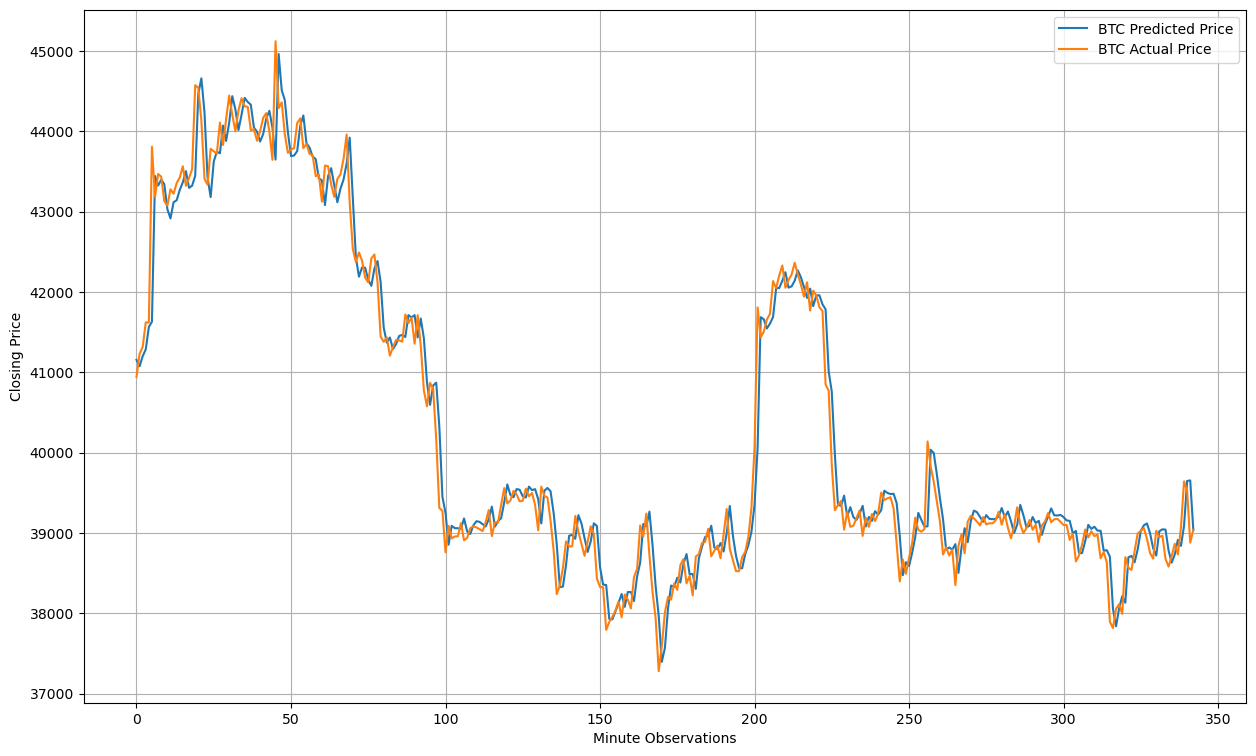

In [19]:
plt.figure(figsize=(15,9))
plt.grid(True)

plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(inv_y_predict, label='BTC Predicted Price')
plt.plot(inv_y, label='BTC Actual Price')
plt.legend()

In [20]:
# make a prediction
y_test_predict = model.predict(test_X)

11/11 [==============================] - 0s 902us/step


In [21]:
# invert scaling for forecast
inv_y_test_predict = scaler.inverse_transform(y_test_predict)
# invert scaling for actual
# test_y = test_y.reshape((len(test_y), 1))
inv_test_y = scaler.inverse_transform(test_y)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_test_y, inv_y_test_predict))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 277.256


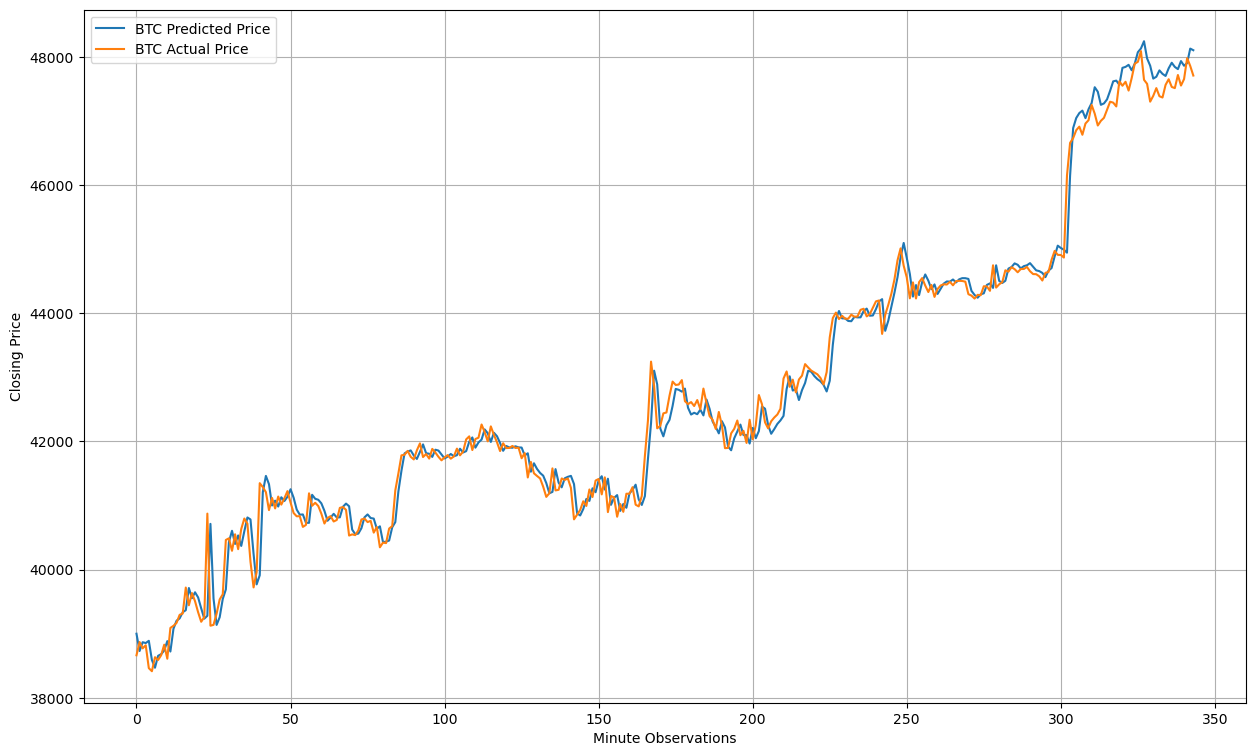

In [22]:
plt.figure(figsize=(15,9))
plt.grid(True)

plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(inv_y_test_predict, label='BTC Predicted Price')
plt.plot(inv_test_y, label='BTC Actual Price')
plt.legend()